In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### <font color='Indigo'> load data after EDA stage

In [124]:
df=pd.read_pickle(r'C:\Course\Repo\Files\Fraud detection\df_model_data_after_EDA_12.3.25.pkl')

In [126]:
df.head()

,ssn,cc_num,gender,city,state,zip,city_pop,job,acct_num,profile,...,merchant,distance_km,distance_category,city_pop_range,age,age_range,trans_month,trans_day,is_weekend,trans_time_group
0,494465528,4710716733274,0,Denver,AZ-NV-CO-UT,80228,990452,Miscellaneous & Low-Transaction Trades,336668930648,adults 2550 male urban,...,Douglas DuBuque and McKenzie,117,Extremely Far,Large Metropolitan Area,23,Young Adult,12,28,0,Evening
1,78973840,4971376230938780,1,Albuquerque,Low-Volume Mixed,87120,641349,Agriculture & Horticulture Workers,681414644491,adults 50up female urban,...,Brown Inc,79,Far,Metropolitan Area,58,Mature Adult,9,18,0,Evening
2,182894325,3504957526435280,1,Chula Vista,CA,91910,239879,Education & Research Professionals,718130984036,adults 50up female urban,...,Beer-Jast,65,Intermediate,Major City,54,Mature Adult,8,30,1,Evening
3,751151762,180076273996654,0,Swansea,GA-NC-SC,29160,8255,Transportation & Logistics Workers,94813738187,adults 50up male urban,...,Cormier LLC,101,Very Far,Small Town,47,Midlife,5,28,0,Evening
4,496044880,4474884213722,1,Pass Christian,TN-KY-AL-LA-MS-AR,39571,13179,Education & Research Professionals,860753373448,adults 2550 female urban,...,Reilly and Sons,84,Far,Small Town,33,Young Adult,6,8,0,Evening


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ssn                300000 non-null  int32   
 1   cc_num             300000 non-null  int64   
 2   gender             300000 non-null  int32   
 3   city               300000 non-null  string  
 4   state              300000 non-null  string  
 5   zip                300000 non-null  int64   
 6   city_pop           300000 non-null  int64   
 7   job                300000 non-null  string  
 8   acct_num           300000 non-null  int64   
 9   profile            300000 non-null  string  
 10  trans_num          300000 non-null  string  
 11  trans_time         300000 non-null  int32   
 12  category           300000 non-null  string  
 13  amt                300000 non-null  float64 
 14  is_fraud           300000 non-null  int64   
 15  merchant           300000 non-null

In [6]:
df.describe()

,ssn,cc_num,gender,zip,city_pop,acct_num,trans_time,amt,is_fraud,distance_km,age,trans_month,trans_day,is_weekend
count,3.000000e+05,3.000000e+05,300000.000000,300000.000000,3.000000e+05,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,4.506057e+08,3.714582e+17,0.517763,51157.361887,2.958743e+05,4.967820e+11,16.745680,65.890231,0.005433,76.478633,41.750397,7.135030,15.887580,0.399200
std,2.599024e+08,1.236841e+18,0.499685,29694.286559,5.694311e+05,2.892582e+11,4.538995,181.704306,0.073511,29.175519,17.876807,3.423084,8.839555,0.489735
min,1.076840e+06,6.040003e+10,0.000000,1002.000000,4.400000e+01,1.837412e+07,0.000000,1.000000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000
25%,2.258682e+08,3.846108e+13,0.000000,27603.000000,1.770000e+04,2.452714e+11,14.000000,8.260000,0.000000,56.000000,28.000000,4.000000,8.000000,0.000000
50%,4.487250e+08,3.506370e+15,1.000000,48126.000000,6.136100e+04,4.946567e+11,17.000000,33.270000,0.000000,79.000000,39.000000,7.000000,16.000000,0.000000
75%,6.764797e+08,4.589016e+15,1.000000,78254.000000,2.366600e+05,7.492637e+11,20.000000,76.630000,0.000000,99.000000,53.000000,10.000000,24.000000,1.000000
max,8.999105e+08,4.999689e+18,1.000000,99929.000000,2.906700e+06,9.999583e+11,23.000000,21209.590000,1.000000,149.000000,93.000000,12.000000,31.000000,1.000000


# Outlier Detection

In [8]:
#Continues Numeric Columns
cols= ['city_pop','amt','distance_km', 'age']
con_df = df[cols]

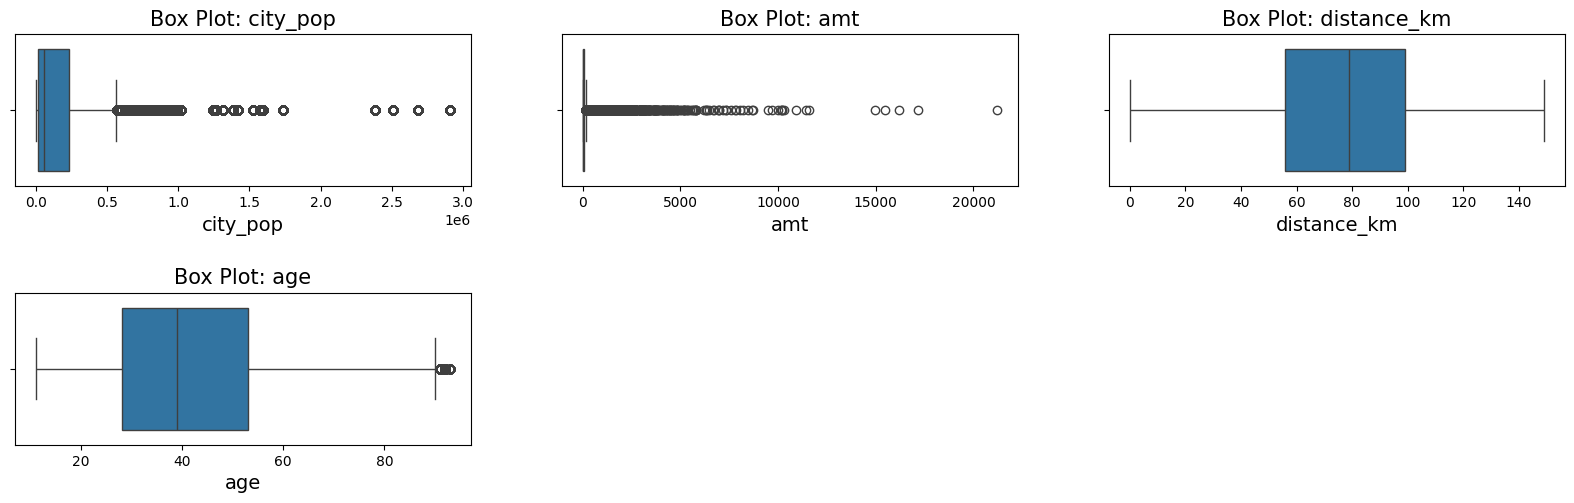

In [9]:
## Using box (Wiskers) plot 
plt.figure(figsize=(20,200))

def outliers_boxplot(animals):
    for i, col in enumerate(animals.columns):
        
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=animals, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(con_df)

## Using Mathematical Functions

 #### <font color='Indigo'>IQR method for identifying outliers to set up a boundary outside of Q1 and Q3

In [134]:
import numpy as np
import pandas as pd
from scipy.stats import norm, ks_2samp

# Function to create a boolean mask for outliers in specified columns
def get_outlier_mask(df, columns):
    """
    Returns a DataFrame with True where outliers exist in the specified columns.

    Parameters:
    - df: Input DataFrame
    - columns: List of columns to check for outliers

    Returns:
    - outlier_mask: Boolean DataFrame where True indicates an outlier
    """
    outlier_mask = pd.DataFrame(False, index=df.index, columns=columns)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        outlier_mask[col] = (df[col] > upper_limit) | (df[col] < lower_limit)
    return outlier_mask

# Correlation comparison function
def cocor(x1, y1, x2, y2):
    """
    Compares correlation coefficients using Fisher's z-transformation.

    Parameters:
    - x1, y1: First pair of variables (e.g., full data)
    - x2, y2: Second pair of variables (e.g., data without outliers)

    Returns:
    - z: Z-score of the difference
    - p: Two-tailed p-value
    """
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1) / (1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2) / (1 - xy2))
    se_diff_r = np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

# Main function to set outliers to NaN in specified columns only
def handle_outliers(df, columns_to_handle, target_col='is_fraud'):
    """
    Sets outliers to NaN only in the specified columns, leaving other columns unchanged.

    Parameters:
    - df: Input DataFrame
    - columns_to_handle: List of columns where outliers should be set to NaN
    - target_col: Name of the target column (default: 'is_fraud')

    Returns:
    - manipulated_data: DataFrame with outliers set to NaN in specified columns
    """
    # Ensure target_col is not in columns_to_handle
    columns_to_handle = [col for col in columns_to_handle if col != target_col]
    
    # Get outlier mask for specified columns
    outlier_mask = get_outlier_mask(df, columns=columns_to_handle)
    
    # Analyze all numeric columns except target for reporting purposes
    numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(target_col, errors='ignore')
    out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])
    rows = []
    
    for col in numeric_cols:
        full_data = df[col]
        target_full = df[target_col]
        
        # Non-outlier data (only if col is in columns_to_handle)
        if col in columns_to_handle:
            non_outlier_rows = ~outlier_mask[col]
        else:
            non_outlier_rows = pd.Series(True, index=df.index)  # No outliers removed
        
        non_outlier_data = df[col][non_outlier_rows]
        target_non_outlier = df[target_col][non_outlier_rows]
        
        # Correlation test
        _, pvalue = cocor(full_data, target_full, non_outlier_data, target_non_outlier)
        corr_change = '+' if pvalue < 0.05 else '-'
        
        # Distribution test
        dist_pval = ks_2samp(full_data, non_outlier_data)[1]
        dist_change = '+' if dist_pval < 0.05 else '-'
        
        # Count outliers (only for columns_to_handle)
        outliers_count = outlier_mask[col].sum() if col in columns_to_handle else 0
        
        rows.append({
            'feature': col,
            'outliers_cnt': outliers_count,
            'distribution_changed': dist_change,
            'correlation_changed': corr_change
        })
    
    # Compile analysis results
    out_df = pd.DataFrame(rows)
    
    # Decision logic: Handle outliers unless both correlation and distribution change
    out_df['handle_outliers'] = 'yes'
    out_df.loc[(out_df['distribution_changed'] == '+') & (out_df['correlation_changed'] == '+'), 'handle_outliers'] = 'no'
    
    # Only handle outliers in columns_to_handle where decision is 'yes'
    handle_outliers_cols = [col for col in columns_to_handle if out_df.loc[out_df['feature'] == col, 'handle_outliers'].values[0] == 'yes']
    
    # Create manipulated_data by setting outliers to NaN only in specified columns
    manipulated_data = df.copy()
    for col in handle_outliers_cols:
        manipulated_data.loc[outlier_mask[col], col] = np.nan
    
    # Report the changes
    print(f"Columns where outliers were set to NaN: {handle_outliers_cols}")
    for col in handle_outliers_cols:
        num_na = manipulated_data[col].isna().sum()
        print(f"Column '{col}': {num_na} values set to NaN")
    print("\nAnalysis Results:")
    print(out_df)
    
    return manipulated_data

In [138]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in con_df:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = outliers_df(con_df).sort_values('Percent', ascending=False)
outliers_df

,Outlier count,Percent
city_pop,48450.0,16.150000
amt,16943.0,5.647667
age,1952.0,0.650667


Crearting df_outliers with dummies

In [140]:
# Specify columns to handle outliers
columns_to_handle = ['city_pop','amt','distance_km', 'age']
    
# Apply the outlier handling
cleaned_df = handle_outliers(df, columns_to_handle=columns_to_handle, target_col='is_fraud')
print("\nOriginal DataFrame:")
print(df)
print("\nDataFrame with outliers set to NaN in specified columns:")
print(cleaned_df)

Columns where outliers were set to NaN: ['city_pop', 'distance_km', 'age']
Column 'city_pop': 48450 values set to NaN
Column 'distance_km': 0 values set to NaN
Column 'age': 1952 values set to NaN

Analysis Results:
        feature  outliers_cnt distribution_changed correlation_changed  \
0           ssn             0                    -                   -   
1        cc_num             0                    -                   -   
2        gender             0                    -                   -   
3           zip             0                    -                   -   
4      city_pop         48450                    +                   -   
5      acct_num             0                    -                   -   
6    trans_time             0                    -                   -   
7           amt         16943                    +                   +   
8   distance_km             0                    -                   -   
9           age          1952               

creating df without ouliers so we can compare the corr and distribution in both datasets

<Axes: >

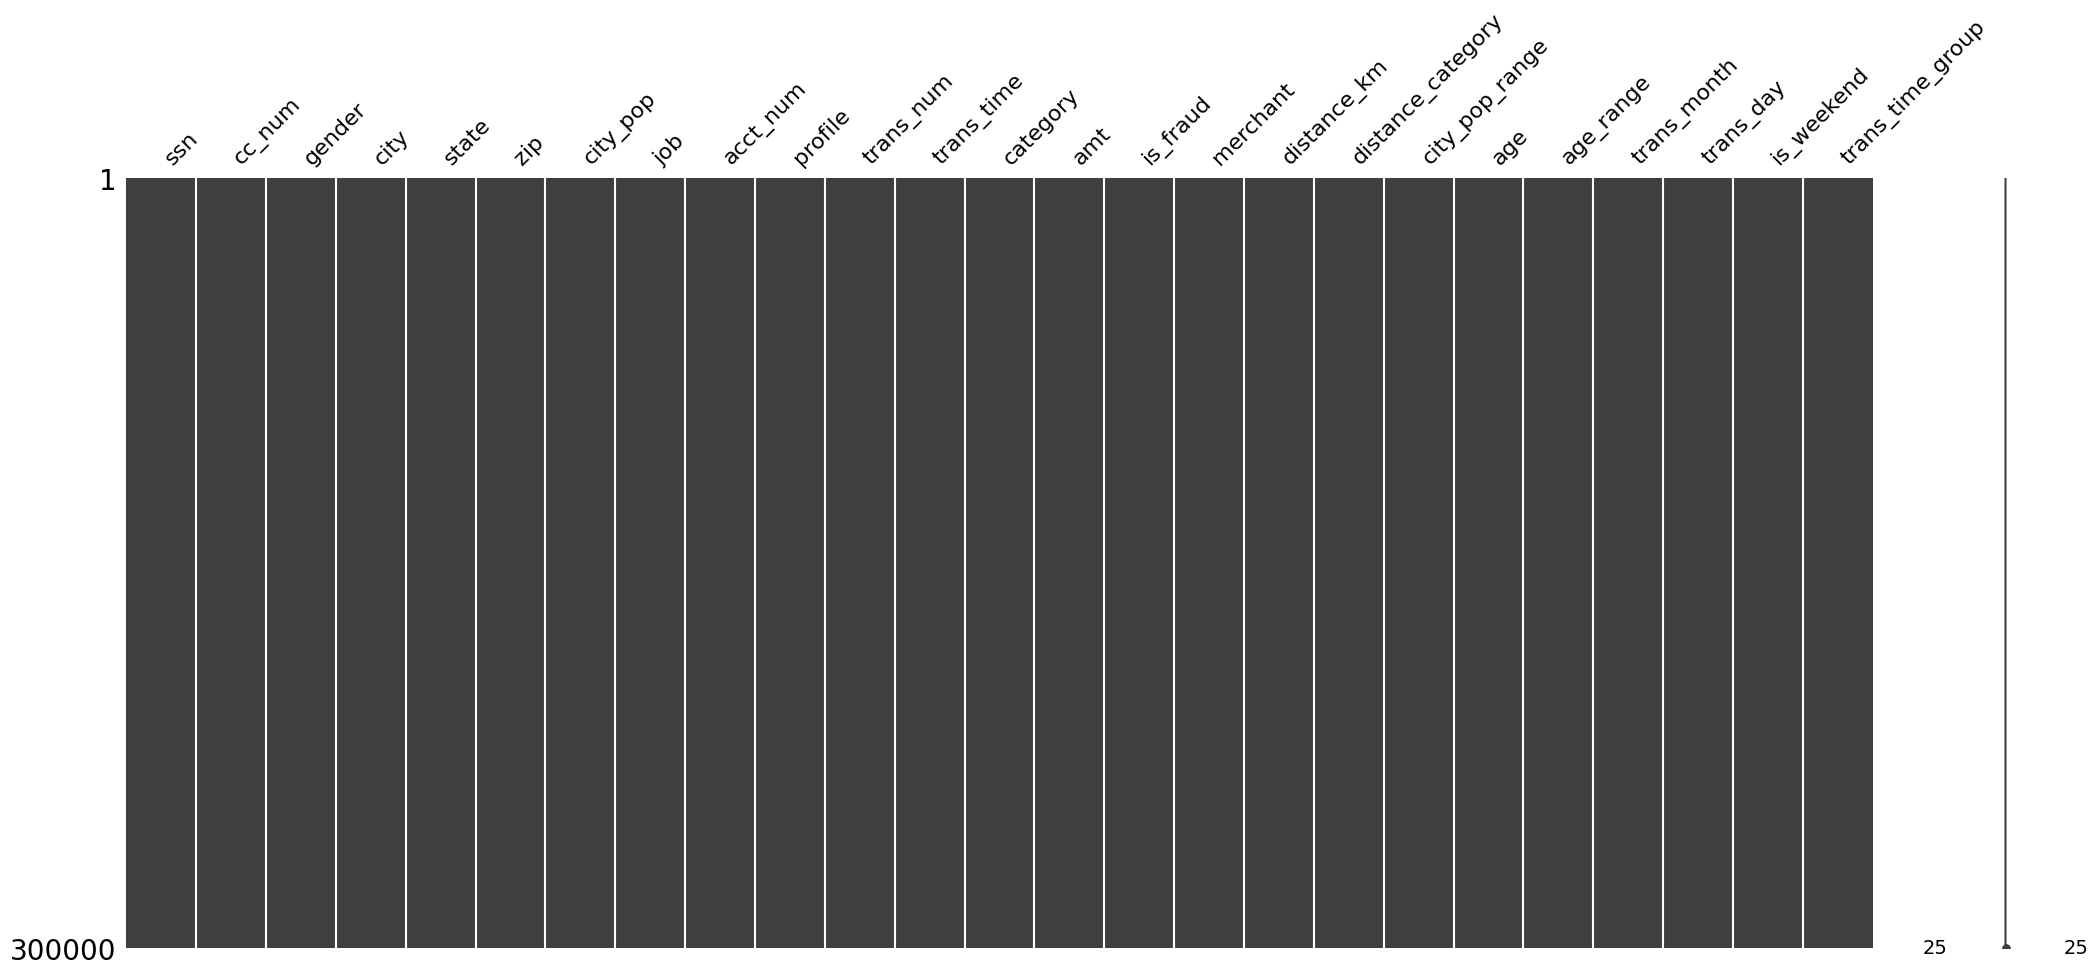

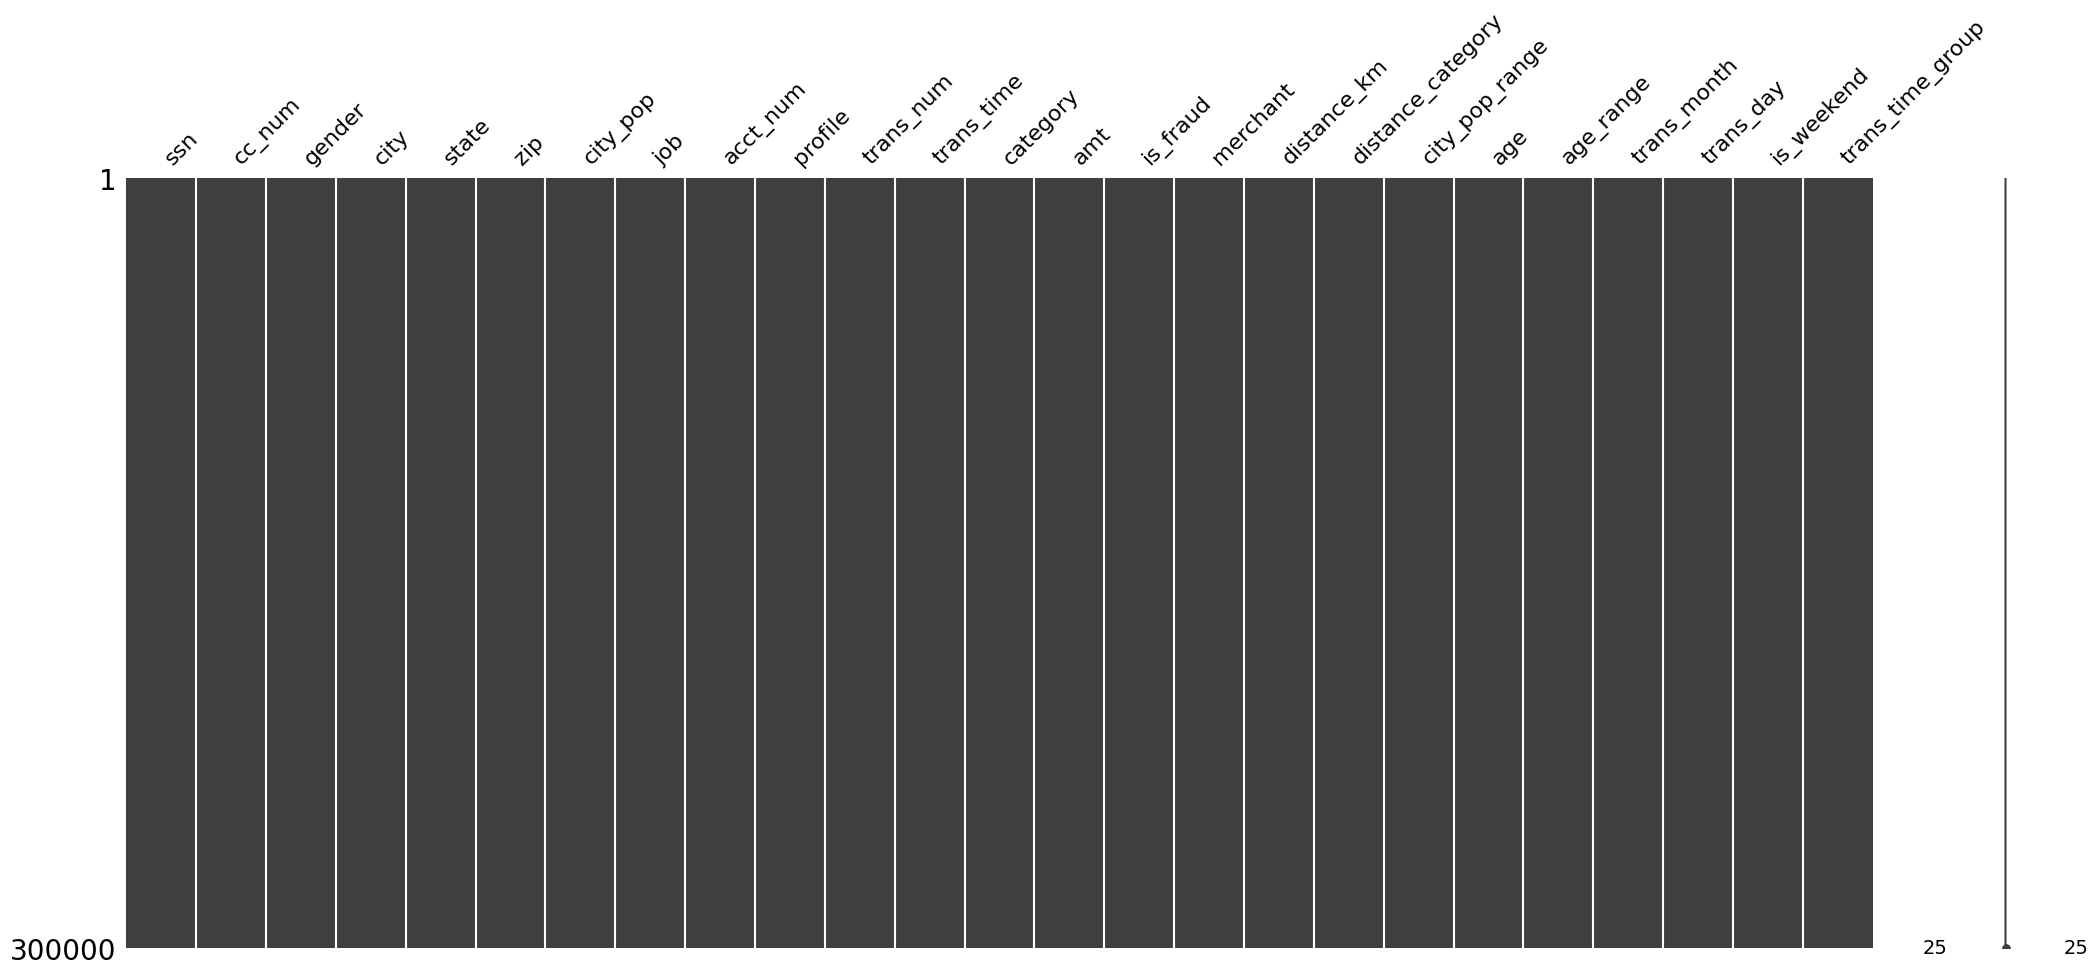

In [88]:
!pip install missingno
import missingno as msno
msno.matrix(df)
msno.matrix(manipulated_data)

<Axes: >

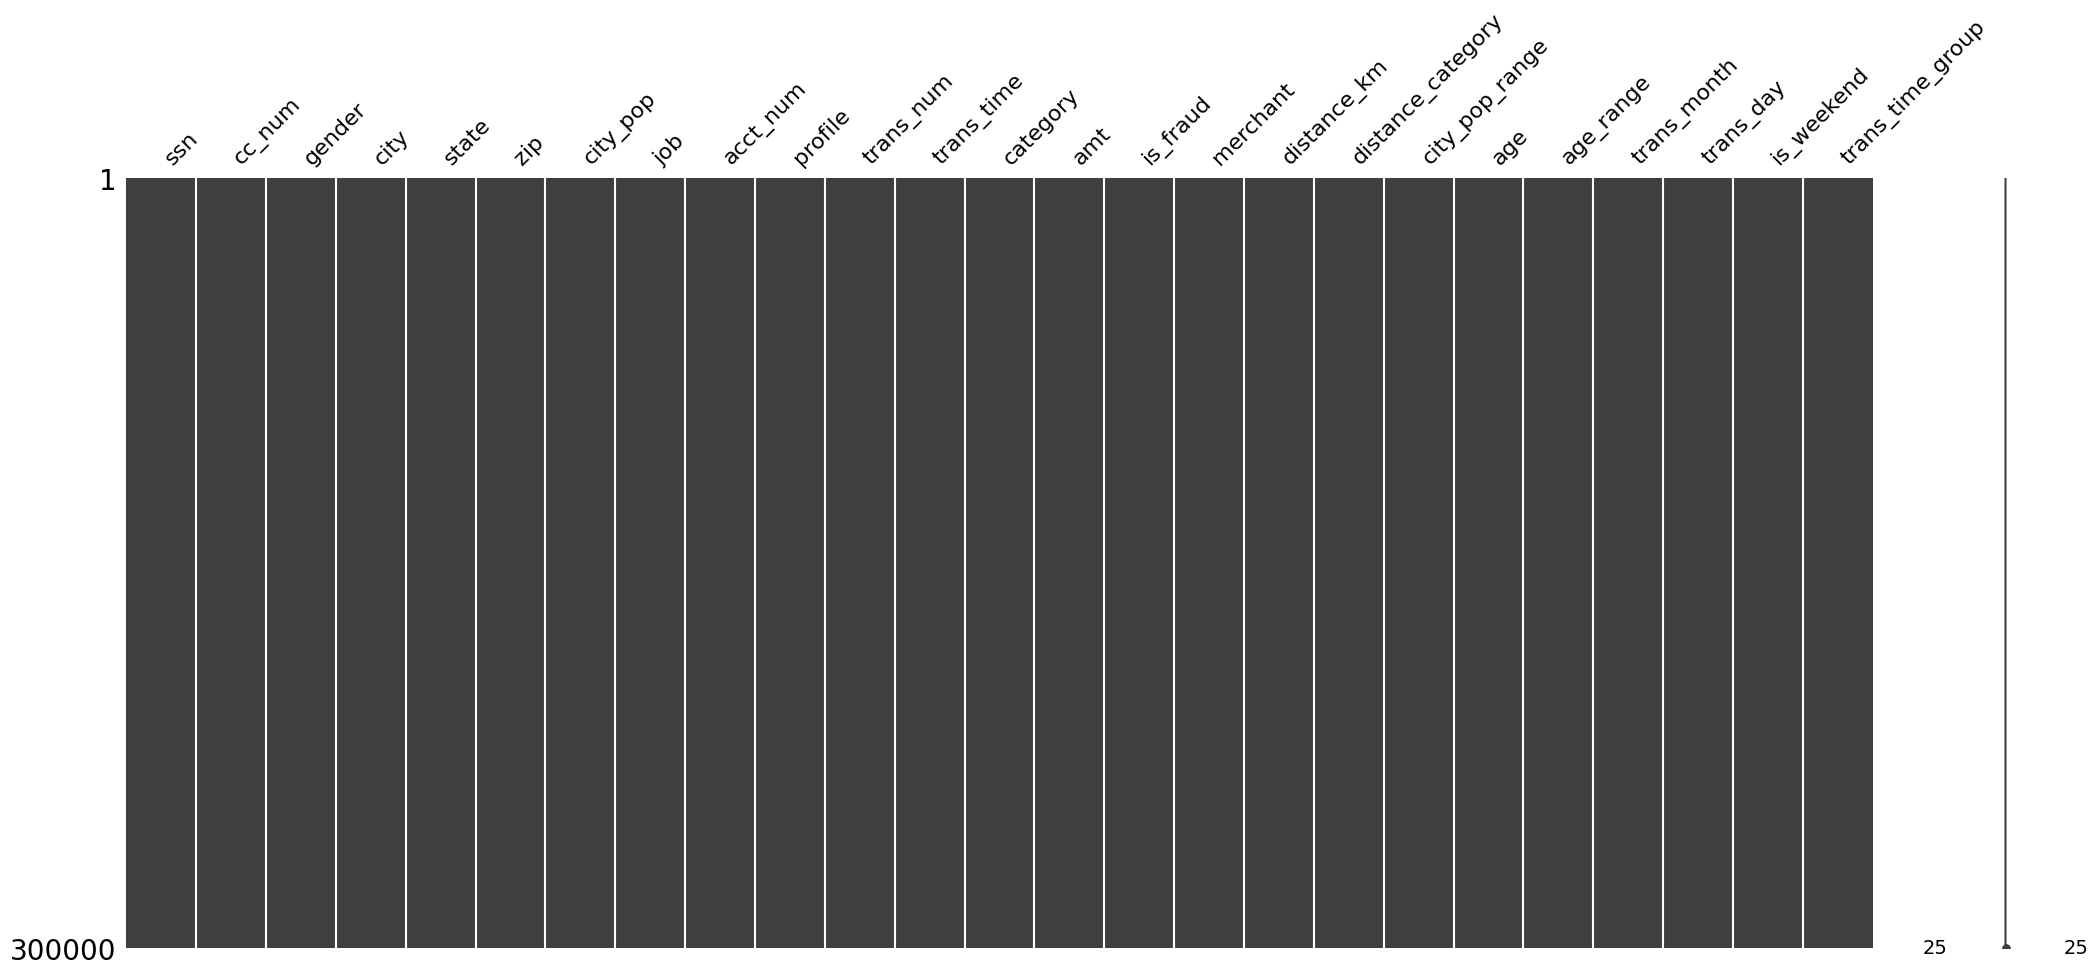

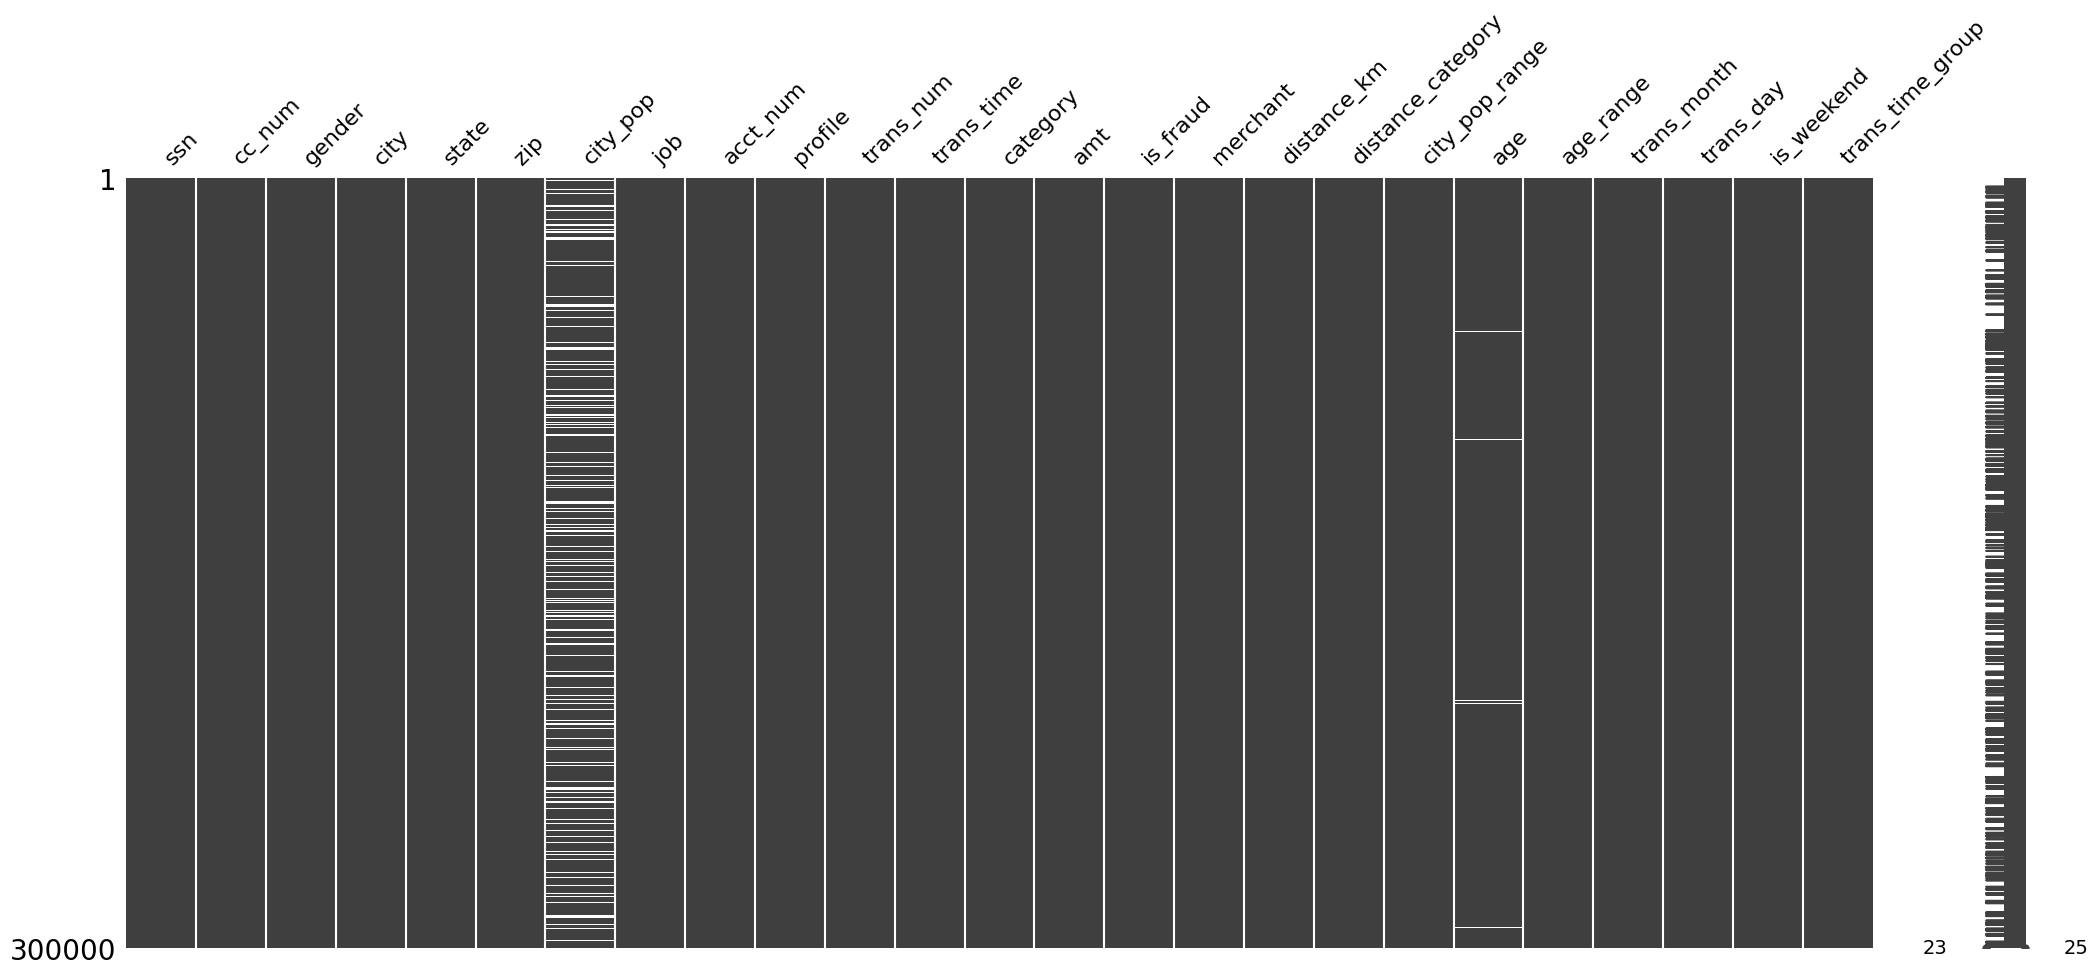

In [132]:
msno.matrix(df)
msno.matrix(cleaned_df)